<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=160px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Graphs For Data Science</h1>
<h1>Searching in Graphs</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopy
import geopy.distance

import networkx as nx
import osmnx as ox
ox.config(log_console=True)

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 5f57da2e58971f31b6fdeda66f96089050480a0d

geopy     : 2.1.0
osmnx     : 1.1.1
networkx  : 2.5
json      : 2.0.9
watermark : 2.1.0
matplotlib: 3.3.2
numpy     : 1.19.2
pandas    : 1.1.3



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Download Manhattan street map

We start by downloading the street map for the island of Manhattan. Here each node is an intersection and each edge a road. Depending on your internet connection, this might take a few seconds

In [4]:
place = 'Manhattan, NY, USA'
G_roads = ox.graph_from_place(place, network_type='drive')

In total we have over 4500 nodes and almost 10,000 edges

In [5]:
print("nodes:", G_roads.number_of_nodes())
print("edges:", G_roads.number_of_edges())

nodes: 4585
edges: 9875


Which we can plot in a familiar form

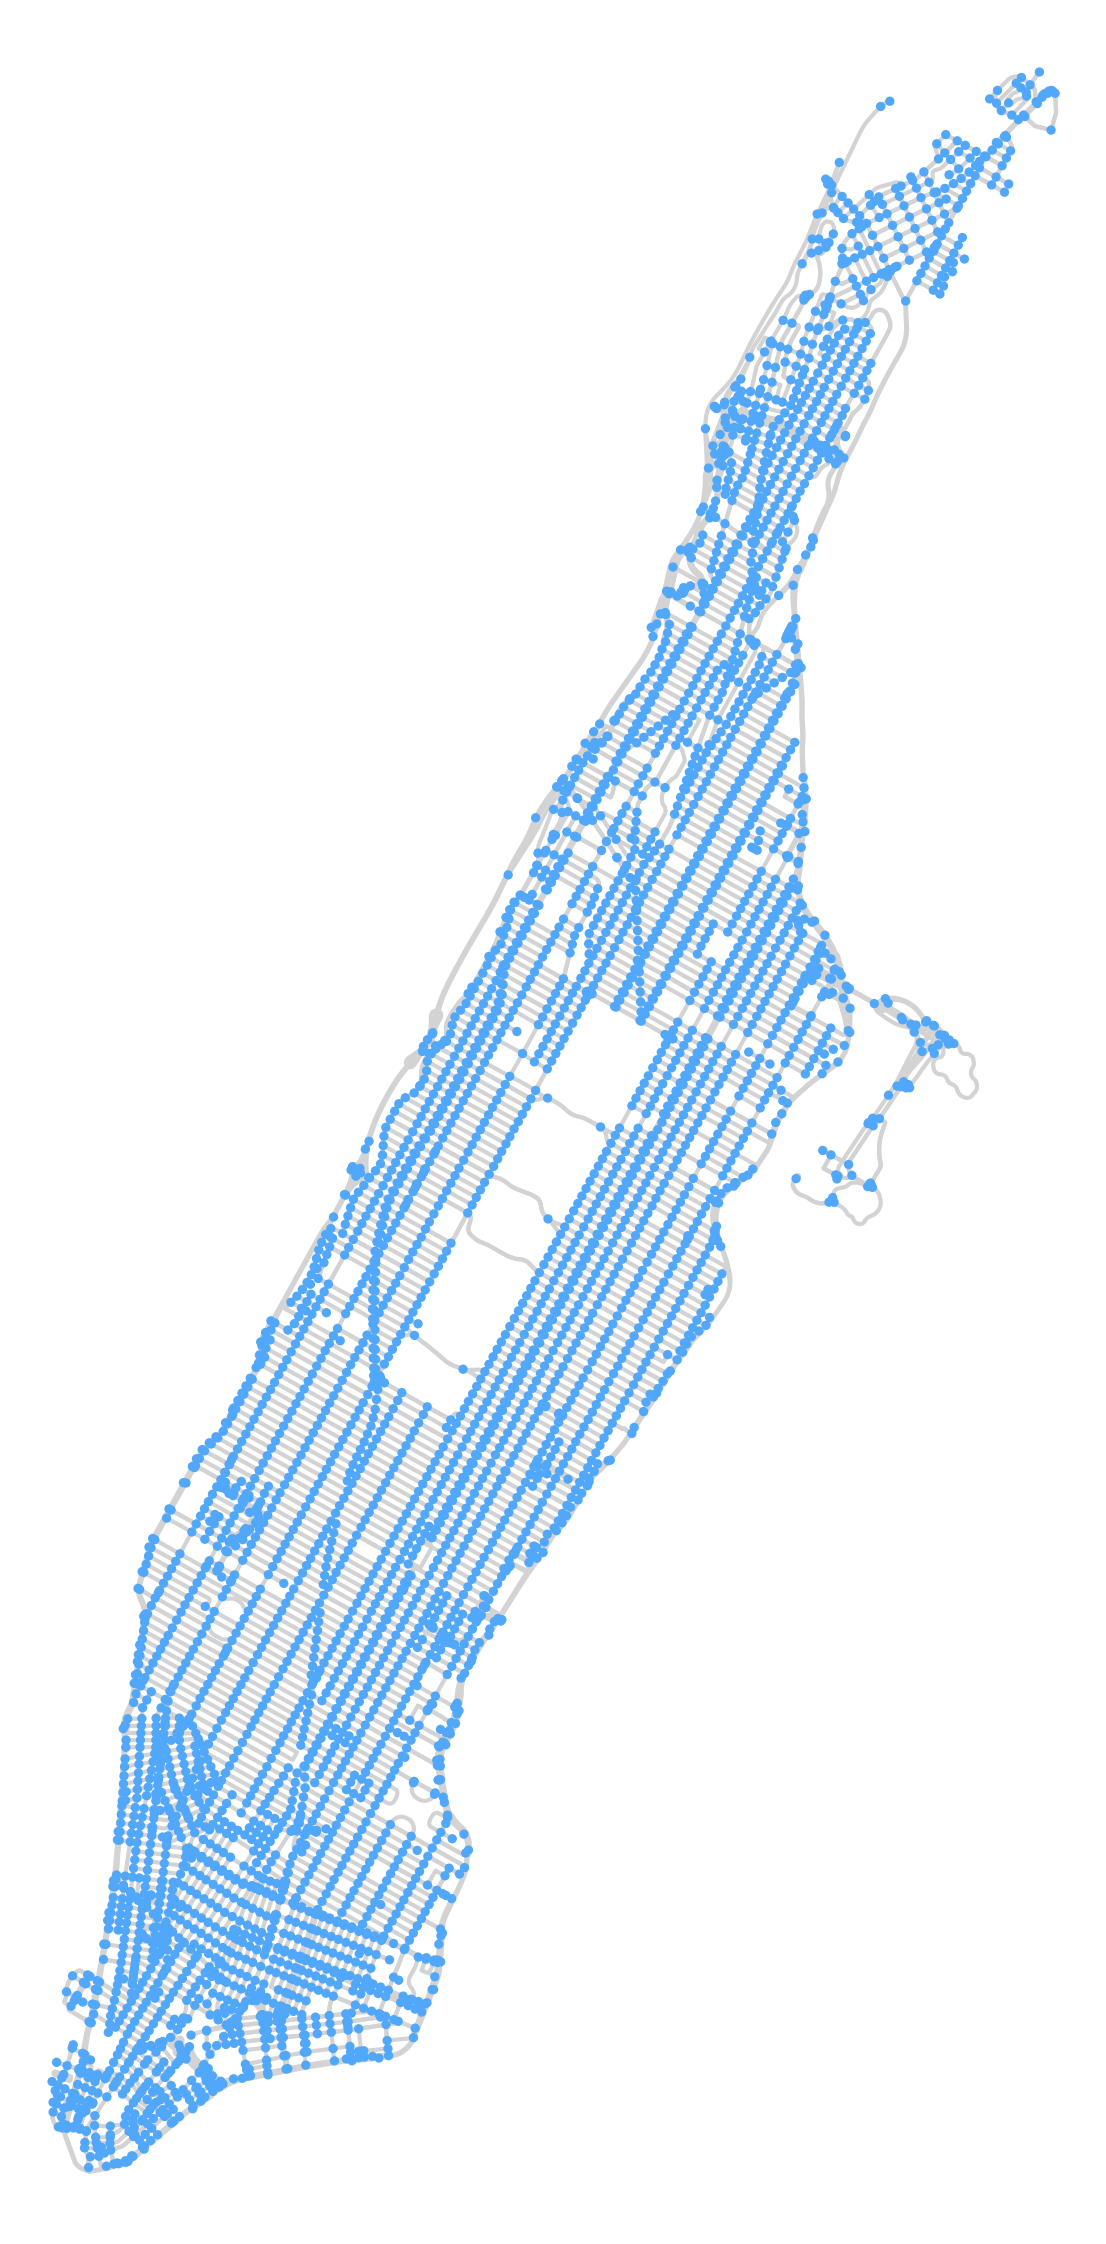

(<Figure size 2400x2400 with 1 Axes>, <AxesSubplot:>)

In [6]:
ox.plot.plot_graph(G_roads, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

Each node comes with lat/long coordinates and a couple other features that characterize it

In [7]:
G_roads.nodes[42421728]

{'y': 40.7980478,
 'x': -73.9600437,
 'highway': 'traffic_signals',
 'street_count': 3}

As does each edge

In [8]:
pprint(dict(G_roads[42442575][42437142]))

{0: {'geometry': <shapely.geometry.linestring.LineString object at 0x7ff8928d9280>,
     'highway': 'secondary',
     'length': 86.214,
     'name': 'Amsterdam Avenue',
     'oneway': False,
     'osmid': 732794019}}


Including the distance in meters

In [9]:
coords_1 = (G_roads.nodes[42442575]['y'], G_roads.nodes[42442575]['x'])
coords_2 = (G_roads.nodes[42437142]['y'], G_roads.nodes[42437142]['x'])

geopy.distance.distance(coords_1, coords_2).m

86.17934367646964

We can map an address to a set of GPS coordinates

In [10]:
ox.geocoder.geocode('World Trade Center')

(40.7118877, -74.0124412)

And find the closest node to each set of coordinates

In [11]:
node_i = ox.get_nearest_node(G_roads, ox.geocoder.geocode('World Trade Center'))
node_j = ox.get_nearest_node(G_roads, ox.geocoder.geocode('Columbia University'))

From which we can find the shortest route. By default NetworkX uses Dijkstra's algorithm

In [12]:
route = nx.shortest_path(G_roads, node_i, node_j, weight = 'length')

Which is just a series of nodes

In [13]:
route[:10]

[4578218122,
 272194254,
 42453398,
 42429570,
 42449613,
 42431626,
 42453417,
 4207143418,
 42436316,
 42440918]

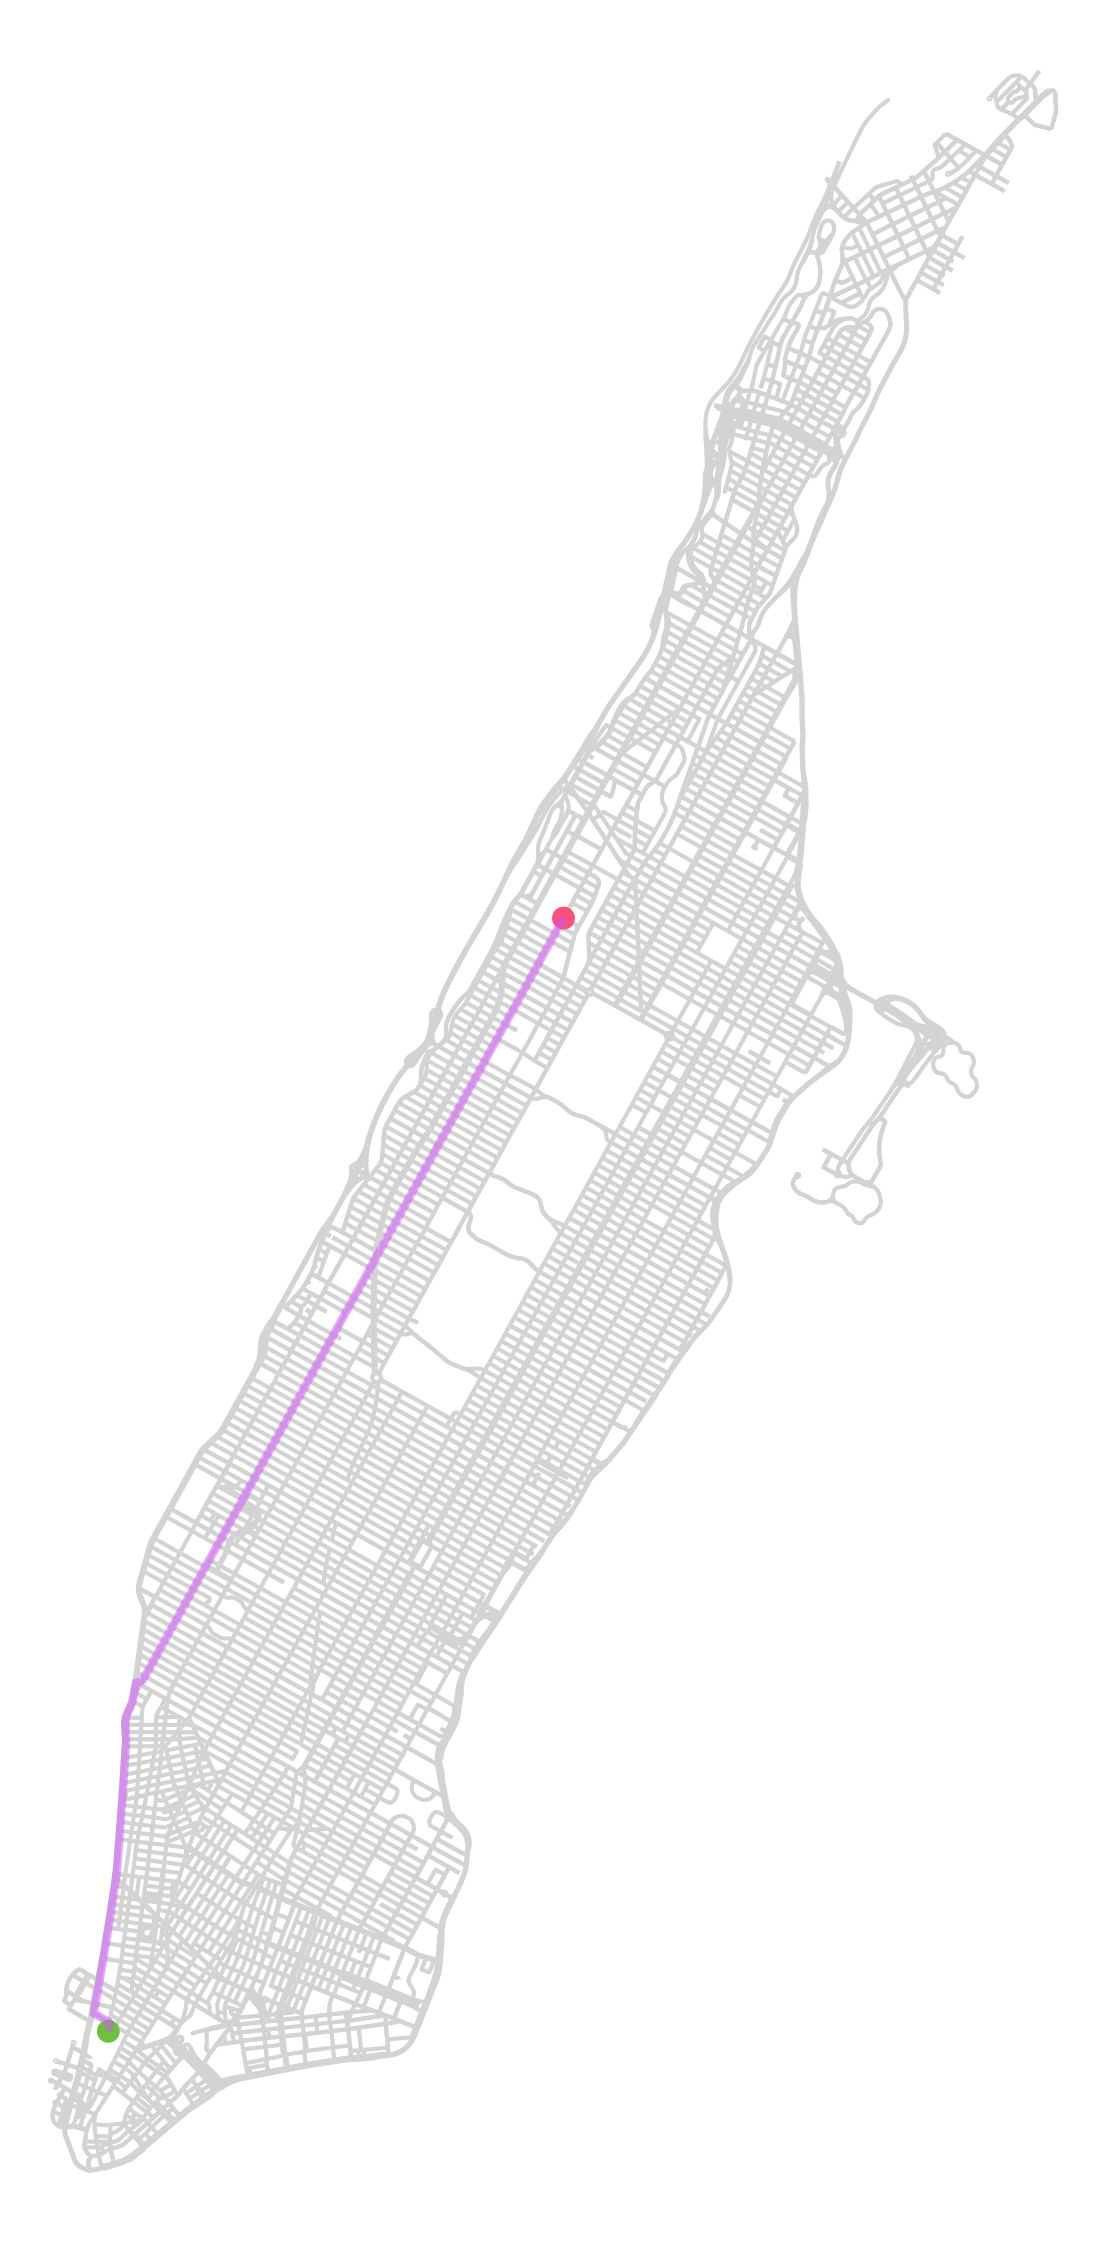

In [14]:
fig, ax = ox.plot.plot_graph_route(G_roads, route, route_alpha=0.5, 
                         route_color=colors[1], route_linewidth=2, 
                         node_size=5, bgcolor='#FFFFFF', node_color='none', 
                         edge_color='lightgray', orig_dest_size=0, show=False, 
                                   close=False)

x = (G_roads.nodes[node_i]["x"], G_roads.nodes[node_j]["x"])
y = (G_roads.nodes[node_i]["y"], G_roads.nodes[node_j]["y"])

ax.scatter(x, y, s=30, c=[colors[2], colors[5]], alpha=1, edgecolor="none")

# Directions

In [15]:
ox.bearing.add_edge_bearings(G_roads);

In [16]:
route_edges = list(zip(route[:-1], route[1:]))

In [17]:
G_roads[route_edges[0][0]][route_edges[0][1]][0]

{'osmid': 462421592,
 'name': 'Greenwich Street',
 'highway': 'residential',
 'maxspeed': '25 mph',
 'oneway': False,
 'length': 81.31700000000001,
 'geometry': <shapely.geometry.linestring.LineString at 0x7ff8c1aa4f70>,
 'bearing': 9.9}

In [18]:
route_edges

[(4578218122, 272194254),
 (272194254, 42453398),
 (42453398, 42429570),
 (42429570, 42449613),
 (42449613, 42431626),
 (42431626, 42453417),
 (42453417, 4207143418),
 (4207143418, 42436316),
 (42436316, 42440918),
 (42440918, 4207143421),
 (4207143421, 42436024),
 (42436024, 42445174),
 (42445174, 4207143428),
 (4207143428, 42440854),
 (42440854, 42442294),
 (42442294, 42448570),
 (42448570, 42440532),
 (42440532, 42453442),
 (42453442, 591454081),
 (591454081, 42452008),
 (42452008, 42436903),
 (42436903, 42453457),
 (42453457, 42452613),
 (42452613, 42453468),
 (42453468, 42449098),
 (42449098, 42440946),
 (42440946, 42453472),
 (42453472, 42439099),
 (42439099, 246649429),
 (246649429, 402475097),
 (402475097, 4133206254),
 (4133206254, 246648219),
 (246648219, 42445766),
 (42445766, 42449341),
 (42449341, 42439286),
 (42439286, 42429664),
 (42429664, 42454381),
 (42454381, 42427390),
 (42427390, 42443676),
 (42443676, 42434285),
 (42434285, 42437914),
 (42437914, 42427483),
 (4242

In [19]:
directions = []

for node_i, node_j in route_edges:
    for road in G_roads[node_i][node_j].values():
        if 'name' not in road:
            continue
        
        name = road['name']
        length = road['length']
        bearing = road['bearing']
    
        # New Road
        if len(directions) == 0 or name != directions[-1][0]:
            directions.append([name, length, bearing])
            print(directions[-1])
            break
        #Update the same road
        else: 
            directions[-1][1] += length
            directions[-1][2] = bearing
            break

['Greenwich Street', 81.31700000000001, 9.9]
['Barclay Street', 177.077, 301.0]
['West Street', 89.012, 11.2]
['10th Avenue', 31.652, 30.2]
['Amsterdam Avenue', 79.023, 29.6]


In [20]:
print("Drive %1.1fm down %s" % (directions[0][1], directions[0][0]))

for i in range(1, len(directions)):
    change = directions[i][2]-directions[i-1][2]
    
    # Find the shortest difference between the two bearings
    if change < -180:
        change += 360
    elif change > 180:
        change -= 360
   
    if np.abs(change) < 5:
        msg = 'Continue onto'
    elif change > 0:
        if change > 25: 
            msg = 'Turn right onto'
        else:
            msg = 'Turn slight right onto'
    elif change < 0:
        if change < -25:
            msg = 'Turn left onto'
        else:
            msg = 'Turn slight left onto'
    
    print('%s %s and drive for %1.1fm' % (msg, directions[i][0], 
                                               directions[i][1]))

print("Arrive at your destination")

Drive 81.3m down Greenwich Street
Turn left onto Barclay Street and drive for 177.1m
Turn right onto West Street and drive for 3138.0m
Turn slight right onto 10th Avenue and drive for 3534.3m
Continue onto Amsterdam Avenue and drive for 4626.0m
Arrive at your destination


<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>